In [7]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import torch

from splitter import Splitter

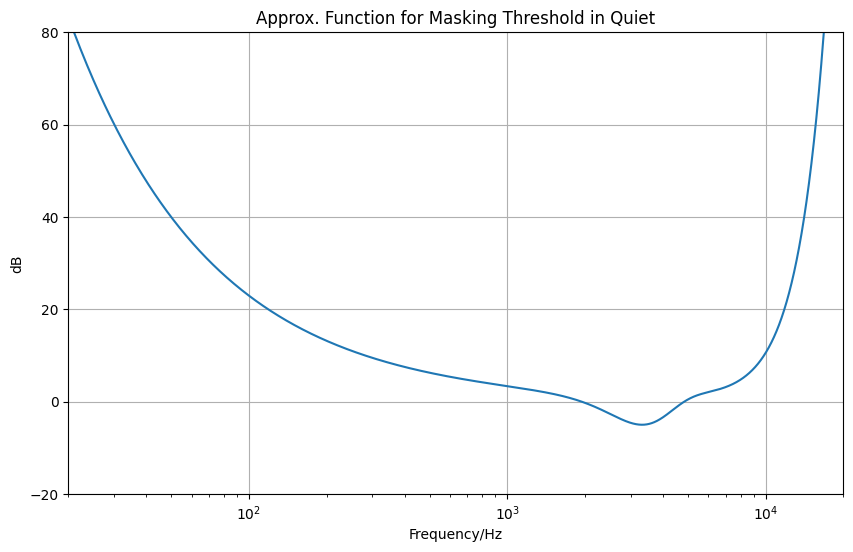

In [27]:
f_l = 20 #20
f_h = 20000 #20000
f=np.linspace(f_l,f_h,44100)
LTQ=np.append(y[0], y[1:] - 0.97 * y[:-1])

plt.figure(figsize=(10,6))
plt.semilogx(f,LTQ)
plt.axis([f_l,f_h, -20,80])
plt.xlabel('Frequency/Hz')
plt.ylabel('dB')
plt.title('Approx. Function for Masking Threshold in Quiet')
plt.grid()

In [9]:
wav_, _ = librosa.load(
    "/home/ytang363/7100_spr2023/audio/Im Alright Mixture.wav",
    mono=False,
    res_type="kaiser_fast",
    sr=44100,
    duration=15,
    offset=0,
)

wav = torch.Tensor(wav_).to("cuda")
funct = Splitter(stem_names=["vocals"])
stft, stft_mag, phase_mix = funct.compute_stft(wav)

In [14]:
stft_mag.shape

torch.Size([2, 1024, 646])

In [24]:
LTQ[0]

inf